# Chapter 05

In [1]:
# Amortization: https://www.interviewcake.com/concept/java/dynamic-array-amortized-analysis

## Modules

In [12]:
import numpy as np
import copy
import pandas as pd
import ctypes
import time
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
%matplotlib inline

## Exercises

### R-5.1

Execute the following experiments and compare the results on your system.

In [3]:
n = 50
import sys
data = []
for k in range(n):
    a = len(data)
    b = sys.getsizeof(data)
    print("Length: {0:3d}; Size in bytes: {1:4d}".format(a, b))
    data.append(None)

Length:   0; Size in bytes:   64
Length:   1; Size in bytes:   96
Length:   2; Size in bytes:   96
Length:   3; Size in bytes:   96
Length:   4; Size in bytes:   96
Length:   5; Size in bytes:  128
Length:   6; Size in bytes:  128
Length:   7; Size in bytes:  128
Length:   8; Size in bytes:  128
Length:   9; Size in bytes:  192
Length:  10; Size in bytes:  192
Length:  11; Size in bytes:  192
Length:  12; Size in bytes:  192
Length:  13; Size in bytes:  192
Length:  14; Size in bytes:  192
Length:  15; Size in bytes:  192
Length:  16; Size in bytes:  192
Length:  17; Size in bytes:  264
Length:  18; Size in bytes:  264
Length:  19; Size in bytes:  264
Length:  20; Size in bytes:  264
Length:  21; Size in bytes:  264
Length:  22; Size in bytes:  264
Length:  23; Size in bytes:  264
Length:  24; Size in bytes:  264
Length:  25; Size in bytes:  264
Length:  26; Size in bytes:  344
Length:  27; Size in bytes:  344
Length:  28; Size in bytes:  344
Length:  29; Size in bytes:  344
Length:  3

### R-5.2
In Code Fragment 5.1, we perform an experiment to compare the length of a Python list to its underlying memory usage. Determining the sequence of array sizes requires a manual inspection of the output of that program. Redesign the experiment so that the program outputs only those values of k at which the existing capacity is exhausted. For example, on a system consistent with the results of Code Fragment 5.2, your program should output that the sequence of array capacities are 0, 4, 8, 16, 25, . . . .

In [40]:
def array_jumps(n):
    data = []
    size_old = 0
    for _ in range(n):
        size = sys.getsizeof(data)
        if size != size_old:
            print(len(data), end = ', ')
        size_old = size
        data.append(None)
        
array_jumps(10000)

0, 1, 5, 9, 17, 26, 36, 47, 59, 73, 89, 107, 127, 149, 174, 202, 234, 270, 310, 355, 406, 463, 527, 599, 680, 772, 875, 991, 1121, 1268, 1433, 1619, 1828, 2063, 2327, 2624, 2959, 3335, 3758, 4234, 4770, 5373, 6051, 6814, 7672, 8638, 9724, 

### R-5.3

Modify the experiment from Code Fragment 5.1 in order to demonstrate that Python’s list class occasionally shrinks the size of its underlying array when elements are popped from a list.

In [41]:
def array_grow_shrink(n, lower_limit = 0.2):
    data = []
    size_old = 0
    current_limit = 10
    for i in range(n):
        if i == current_limit:
            while len(data)> current_limit*lower_limit:
                data.pop()
                size = sys.getsizeof(data)
                print(len(data), size, end = '\t\t')
                if size<size_old:
                    print ('Size decreased from:', size_old, size)
                else: print("")
                size_old = size
            current_limit *= 10
        data.append(None)
        
        
array_grow_shrink(1000)

9 192		
8 192		
7 144		Size decreased from: 192 144
6 144		
5 144		
4 120		Size decreased from: 144 120
3 120		
2 104		Size decreased from: 120 104
91 928		
90 928		
89 928		
88 928		
87 928		
86 928		
85 928		
84 928		
83 928		
82 928		
81 928		
80 928		
79 928		
78 928		
77 928		
76 928		
75 928		
74 928		
73 928		
72 928		
71 928		
70 928		
69 928		
68 928		
67 928		
66 928		
65 928		
64 928		
63 928		
62 928		
61 928		
60 928		
59 928		
58 928		
57 928		
56 928		
55 928		
54 928		
53 584		Size decreased from: 928 584
52 584		
51 584		
50 584		
49 584		
48 584		
47 584		
46 584		
45 584		
44 584		
43 584		
42 584		
41 584		
40 584		
39 584		
38 584		
37 584		
36 584		
35 584		
34 584		
33 584		
32 584		
31 384		Size decreased from: 584 384
30 384		
29 384		
28 384		
27 384		
26 384		
25 384		
24 384		
23 384		
22 384		
21 384		
20 384		


### R-5.4

Our `DynamicArray` class below does not support use of negative indices with `__getitem__`. Update that method to better match the semantics of a Python list.

In [47]:
class DynamicArray:
    """A dynamic array class akin to a simplified Python list"""
    
    def __init__(self):
        """Create an empty array."""
        self._n = 0
        self._capacity = 1
        self._A = self._make_array(self._capacity)
        
    def __len__(self): # Must declare such inbuilt methods, else can't call python methods
        """Return number of elements stored in the array"""
        return self._n
    
    def __getitem__(self, k):
        if 0 <= k < self._n:
            return self._A[k]
        else:
            return self._A[k - 1]
        
    def append(self, obj):
        """Add object to end of the array."""
        if self._n == self._capacity:
            self._resize(2 * self._capacity)
        self._A[self._n] = obj
        self._n += 1
    
    def _resize(self, c):
        """Resize internal array to capacity c."""
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c
        
    def _make_array(self, c):
        """Return new array with capacity c."""
        return (c * ctypes.py_object)()

In [48]:
darray = DynamicArray()

In [49]:
darray.append(4)
darray.append(1)
darray.append(3)
len(darray)

3

In [50]:
print(darray[-3])
print(darray[-2])
print(darray[-1])
print(darray[0])
print(darray[1])
print(darray[2])

4
1
3
4
1
3


### R-5.5

Redo the justification of Proposition 5.1 assuming that the the cost of growing the array from size k to size 2k is 3k cyber-dollars. How much should each append operation be charged to make the amortization work?

<b>Original Justification</b>: Let us assume that one cyber-dollar is enough to pay for the execu- tion of each append operation in S, excluding the time spent for growing the array. Also, let us assume that growing the array from size k to size 2k requires k cyber- dollars for the time spent initializing the new array. We shall charge each append operation three cyber-dollars. Thus, we overcharge each append operation that does not cause an overflow by two cyber-dollars. Think of the two cyber-dollars profited in an insertion that does not grow the array as being “stored” with the cell in which the element was inserted. An overflow occurs when the array S has 2i elements, for some integer i ≥ 0, and the size of the array used by the array representing S is 2i. Thus, doubling the size of the array will require 2i cyber-dollars. Fortunately, these cyber-dollars can be found stored in cells 2i−1 through 2i − 1. (See Figure 5.14.) Note that the previous overflow occurred when the number of elements became larger than 2i−1 for the first time, and thus the cyber-dollars stored in cells 2i−1 through 2i − 1 have not yet been spent. Therefore, we have a valid amortization scheme in which each operation is charged three cyber-dollars and all the comput- ing time is paid for. That is, we can pay for the execution of n append operations using 3n cyber-dollars. In other words, the amortized running time of each append operation is O(1); hence, the total running time of n append operations is O(n).

<b>New Justification</b>: If we need 3k cyber dollars now for doubling the array, we need to charge more for each append operation to make up for the total cost of 3k. We only have k/2 operations since the array is always half-filled (except base case when array is just initialised)

Therefore, k/2 operations * append cost = 3k. Append cost = 6.

### R-5.6

Our implementation of insert for the `DynamicArray` class, as given below, has the following inefficiency. in the case when a resize occurs, the resize operation takes time to copy all the elements from an old array to a new array, and then the subsequent loop in the body of `insert` shifts many of those elements. Give an improved implementation of the `insert` method, so that, in the case of a resize, the elements are shifted into their final position during that operation, thereby avoiding the subsequent shifting.

In [8]:
class DynamicArray:
    """A dynamic array class akin to a simplified Python list"""
    
    def __init__(self):
        """Create an empty array."""
        self._n = 0
        self._capacity = 1
        self._A = self._make_array(self._capacity)
        
    def __len__(self):
        """Return number of elements stored in the array"""
        return self._n
    
    def __getitem__(self, k):
        if 0<= k < self._n:
            return self._A[k]
        else:
            return self._A[k - 1]
        
    def append(self, obj):
        """Add object to end of the array."""
        if self._n == self._capacity:
            self._resize(2 * self._capacity)
        self._A[self._n] = obj
        self._n += 1
    
    def _resize(self, c):
        """Resize internal array to capacity c."""
        B = self._make_array(c)
        for k in range(self._n):  # For loop to copy over to new array
            B[k] = self._A[k] 
        self._A = B
        self._capacity = c
        
    def _make_array(self, c):
        """Return new array with capacity c."""
        return (c * ctypes.py_object)()
    
    def insert(self, k, value):
        if self._n == self._capacity: # If no more space in array
            self._resize(2 * self._capacity) # Double the capacity to a new array
        for j in range(self._n, k, -1):
            self._A[j] = self._A[j-1] # Shift the old values to new positions in array, making space for insert
        self._A[k] = value # Finally insert
        self._n += 1
    
    def improved_insert(self, k, value):
        if self._n == self._capacity: # If array is full
            tmp = self._make_array(2 * self._capacity) # Create entire new array
            self._capacity *= 2
            tmp[:k] = self._A[:k] # Pass all values before insertion position into new arr
            tmp[k + 1: k + len(self._A[k:]) + 1] = self._A[k:]  # Pass all values after insertion position into new arr
            self._A = tmp
        else: # If array is not full
            self._A[k + 1 : self._n + 1] = self._A[k: self._n] # Move all values from k onwards by 1 step forward
        self._A[k] = value
        self._n += 1

In [9]:
insert_num = [i * 500 for i in range(1, 10)]
time_orig = []
time_impr = []

In [10]:
darray = DynamicArray()
darray.append(4)
darray.append(3)
darray.append(2)
darray.append(1)
darray.append(0)

In [11]:
for trial in insert_num:
    start = time.time()
    for i in range(trial):
        darray.insert(0, -1)
    end = time.time()
    time_orig.append(end-start)

In [12]:
print(time_orig)

[0.07582902908325195, 0.5971958637237549, 1.5694000720977783, 3.560281753540039, 6.4000489711761475, 10.19887089729309, 16.85440421104431, 29.436833143234253, 39.917736291885376]


In [13]:
darray = DynamicArray()
darray.append(4)
darray.append(3)
darray.append(2)
darray.append(1)
darray.append(0)

In [14]:
for trial in insert_num:
    start = time.time()
    for i in range(trial):
        darray.improved_insert(0, -1)
    end = time.time()
    time_impr.append(end-start)

In [15]:
print(time_impr)

[0.036537885665893555, 0.25830888748168945, 1.034674882888794, 2.0513410568237305, 4.114071846008301, 6.932934999465942, 10.642021179199219, 16.19435214996338, 23.61278009414673]


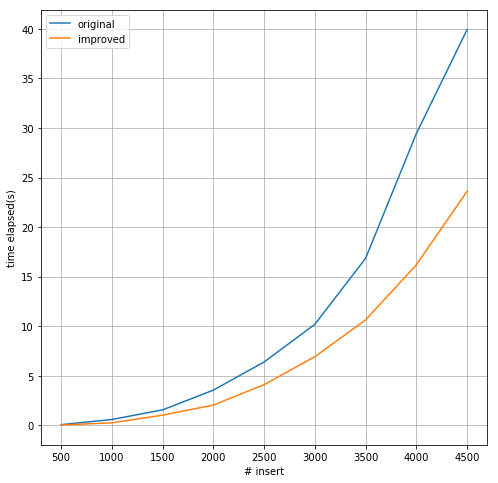

In [16]:
plt.figure(figsize=(8,8))
plt.plot(insert_num, time_orig, label="original")
plt.plot(insert_num, time_impr, label="improved")
plt.legend()
plt.grid()
plt.ylabel('time elapsed(s)')
plt.xlabel('# insert')
plt.show()

### R-5.7

Let A be an array of size n ≥ 2 containing integers from 1 to n − 1, inclusive, with exactly one repeated. Describe a fast algorithm for finding the integer in A that is repeated.

In [51]:
def find_repeat(S):
    length = len(S)
    array_check = [0]*(length) # Array flags
    for element in S:
        if array_check[element]: 
            return element
        else: 
            array_check[element] = 1
            
    return ('No duplicate found')

S = list(range(100))
S[0] = 92

print('Using the array method the answer is: ',find_repeat(S))

Using the array method the answer is:  92


### R-5.8

Experimentally evaluate the efficiency of the pop method of Python’s list class when using varying indices as a parameter, as we did for insert on page 205. Report your results akin to Table 5.5.

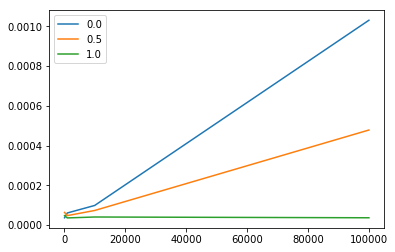

       100       1000      10000     100000
0.0  0.000037  0.000061  0.000099  0.001030
0.5  0.000064  0.000048  0.000074  0.000478
1.0  0.000048  0.000036  0.000041  0.000037


In [52]:
import time
import pandas as pd
import matplotlib.pyplot as plt

def time_pops(test_array):
    results = pd.DataFrame()
    
    for test_len in test_array:
        
        for position in [0, 0.5, 1]:
            start = time.time()
            for _ in range (100): #Lower this to speed up the program, although the numbers may be too small to see
                data = [None]*test_len
                while len(data)>1: #stop a bit early to avoid a negative index
                    data.pop(int((len(data)-1)*position))
            end = time.time()
            
            results.loc[position, test_len] = (end-start)/test_len
    return results
    
test_array = [10**i for i in range(2, 6)]
results = time_pops(test_array)

for i in range(len(results)):
    plt.plot(results.iloc[i])

plt.legend()
plt.show()


print(results)

### R-5.9

Explain the changes that would have to be made to the program of Code Fragment 5.11 so that it could perform the Caesar cipher for messages that are written in an alphabet-based language other than English, such as Greek, Russian, or Hebrew.

In [ ]:
# Try to list out all possible characters in the language in a list, then replace 
# each letter by that letter shifted forward by n.

### R-5.10

The constructor for the CaesarCipher class in Code Fragment 5.11 can be implemented with a two-line body by building the forward and backward strings using a combination of the join method and an appropriate comprehension syntax. Give such an implementation.

In [69]:
class CaesarCipher:
    '''Class for doing encryption and decryption using a Caesar cipher.'''

    def __init__(self, shift):
        '''Construct Caesar cipher using given integer shift for rotation.''' 
        encoder = [None]*26 # temp array for encryption
        decoder = [None] * 26 # temp array for decryption 
        for k in range(26):
            encoder[k] = chr((k + shift) % 26 + ord( 'A' ))
            decoder[k] = chr((k - shift) % 26 + ord( 'A' ))
        self.forward = ''.join(encoder) # will store as string 
        self.backward = ''.join(decoder) # since fixed
    def encrypt(self, message):
        '''Return string representing encripted message.'''
        return self. transform(message, self. forward)
    def decrypt(self, secret):
        '''Return decrypted message given encrypted secret.'''
        return self. transform(secret, self. backward)
    def transform(self, original, code):
        '''Utility to perform transformation based on given code string.''' 
        msg = list(original)
        for k in range(len(msg)):
            if msg[k].isupper(): 
                j=ord(msg[k])-ord('A') #indexfrom0to25
                msg[k] = code[j]# replace this character
        return ''.join(msg)

class CaesarCipherNew:
    '''Class for doing encryption and decryption using a Caesar cipher.'''

    def __init__(self, shift):
        '''Construct Caesar cipher using given integer shift for rotation.''' 
        self._forward = ''.join(chr((k+shift)%26 + ord('A')) for k in range(26)) 
        self._backward = ''.join(chr((k-shift)%26 + ord('A')) for k in range(26)) 
    def encrypt(self, message):
        '''Return string representing encripted message.'''
        return self. transform(message, self._forward)
    def decrypt(self, secret):
        '''Return decrypted message given encrypted secret.'''
        return self. transform(secret, self._backward)
    def transform(self, original, code):
        '''Utility to perform transformation based on given code string.''' 
        msg = list(original)
        for k in range(len(msg)):
            if msg[k].isupper(): 
                j=ord(msg[k])-ord('A') #indexfrom0to25
                msg[k] = code[j]# replace this character
        return ''.join(msg)

if __name__ == '__main__' :
    cipher = CaesarCipher(3)
    message = "THE EAGLE IS IN PLAY; MEET AT JOE S." 
    coded = cipher.encrypt(message)
    print( 'Secret:   ', coded)
    answer = cipher.decrypt(coded)
    print( 'Message: ', answer)
    cipher = CaesarCipherNew(3)
    coded = cipher.encrypt(message)
    print( 'Secret:   ', coded)
    answer = cipher.decrypt(coded)
    print( 'Message: ', answer)

Secret:    WKH HDJOH LV LQ SODB; PHHW DW MRH V.
Message:  THE EAGLE IS IN PLAY; MEET AT JOE S.
Secret:    WKH HDJOH LV LQ SODB; PHHW DW MRH V.
Message:  THE EAGLE IS IN PLAY; MEET AT JOE S.


### R-5.11

Use standard control structures to compute the sum of all numbers in an n × n data set, represented as a list of lists.

In [70]:
def sum_2d(array):
    total = 0
    for i in range(len(array)):   #loop over the outer list
        for j in range(len(array[i])): #loop over inner list
            total += array[i][j]
    return total

#Create a list from 1 to 100, which should have the sum (101)(100)/2 = 5050
list_of_lists = [list(range(i, i+10)) for i in range(1,100, 10)]
print(sum_2d(list_of_lists))

5050


### R-5.12

Describe how the built-in sum function can be combined with Python’s comprehension syntax to compute the sum of all numbers in an n × n data set, represented as a list of lists.

In [74]:
list_of_lists = [list(range(i, i+10)) for i in range(1,100, 10)]

print(sum(sum(x) for x in list_of_lists))

5050


### C-5.13

In the experiment of following code, we begin with an empty list. If `ata` were initially constructed with nonempty length, does this affect the sequence of values a which underlying array is expanded? Perform your own experiments, and comment on any relationship you see between the initial length and the expansion sequence.

In [17]:
n = 30
import sys
data = []
for k in range(n):
    a = len(data)
    b = sys.getsizeof(data)
    print("Length: {0:3d}; Size in bytes: {1:4d}".format(a, b))
    data.append(None)

Length:   0; Size in bytes:   64
Length:   1; Size in bytes:   96
Length:   2; Size in bytes:   96
Length:   3; Size in bytes:   96
Length:   4; Size in bytes:   96
Length:   5; Size in bytes:  128
Length:   6; Size in bytes:  128
Length:   7; Size in bytes:  128
Length:   8; Size in bytes:  128
Length:   9; Size in bytes:  192
Length:  10; Size in bytes:  192
Length:  11; Size in bytes:  192
Length:  12; Size in bytes:  192
Length:  13; Size in bytes:  192
Length:  14; Size in bytes:  192
Length:  15; Size in bytes:  192
Length:  16; Size in bytes:  192
Length:  17; Size in bytes:  264
Length:  18; Size in bytes:  264
Length:  19; Size in bytes:  264
Length:  20; Size in bytes:  264
Length:  21; Size in bytes:  264
Length:  22; Size in bytes:  264
Length:  23; Size in bytes:  264
Length:  24; Size in bytes:  264
Length:  25; Size in bytes:  264
Length:  26; Size in bytes:  344
Length:  27; Size in bytes:  344
Length:  28; Size in bytes:  344
Length:  29; Size in bytes:  344


In [18]:
n = 30
import sys
data = [None] * 10
for k in range(n):
    a = len(data)
    b = sys.getsizeof(data)
    print("Length: {0:3d}; Size in bytes: {1:4d}".format(a, b))
    data.append(None)

Length:  10; Size in bytes:  144
Length:  11; Size in bytes:  208
Length:  12; Size in bytes:  208
Length:  13; Size in bytes:  208
Length:  14; Size in bytes:  208
Length:  15; Size in bytes:  208
Length:  16; Size in bytes:  208
Length:  17; Size in bytes:  208
Length:  18; Size in bytes:  208
Length:  19; Size in bytes:  280
Length:  20; Size in bytes:  280
Length:  21; Size in bytes:  280
Length:  22; Size in bytes:  280
Length:  23; Size in bytes:  280
Length:  24; Size in bytes:  280
Length:  25; Size in bytes:  280
Length:  26; Size in bytes:  280
Length:  27; Size in bytes:  280
Length:  28; Size in bytes:  360
Length:  29; Size in bytes:  360
Length:  30; Size in bytes:  360
Length:  31; Size in bytes:  360
Length:  32; Size in bytes:  360
Length:  33; Size in bytes:  360
Length:  34; Size in bytes:  360
Length:  35; Size in bytes:  360
Length:  36; Size in bytes:  360
Length:  37; Size in bytes:  360
Length:  38; Size in bytes:  448
Length:  39; Size in bytes:  448


In [19]:
n = 30
import sys
data = [None] * 20
for k in range(n):
    a = len(data)
    b = sys.getsizeof(data)
    print("Length: {0:3d}; Size in bytes: {1:4d}".format(a, b))
    data.append(None)

Length:  20; Size in bytes:  224
Length:  21; Size in bytes:  296
Length:  22; Size in bytes:  296
Length:  23; Size in bytes:  296
Length:  24; Size in bytes:  296
Length:  25; Size in bytes:  296
Length:  26; Size in bytes:  296
Length:  27; Size in bytes:  296
Length:  28; Size in bytes:  296
Length:  29; Size in bytes:  296
Length:  30; Size in bytes:  376
Length:  31; Size in bytes:  376
Length:  32; Size in bytes:  376
Length:  33; Size in bytes:  376
Length:  34; Size in bytes:  376
Length:  35; Size in bytes:  376
Length:  36; Size in bytes:  376
Length:  37; Size in bytes:  376
Length:  38; Size in bytes:  376
Length:  39; Size in bytes:  376
Length:  40; Size in bytes:  472
Length:  41; Size in bytes:  472
Length:  42; Size in bytes:  472
Length:  43; Size in bytes:  472
Length:  44; Size in bytes:  472
Length:  45; Size in bytes:  472
Length:  46; Size in bytes:  472
Length:  47; Size in bytes:  472
Length:  48; Size in bytes:  472
Length:  49; Size in bytes:  472


From the test above, it seems the initial length of a list not only affects the sequence of expanding values but also confirms that Python's list does not rely on simple arithmetic or geometric progression while expanding the size of it.

### C-5.14

The shuffle method, supported by the random module, takes a Python list and rearranges it so that every possible ordering is equally likely. Implement your own version of such a function. You may rely on the randrange(n) function of the random module, which returns a random number between 0 and n − 1 inclusive.

In [75]:
from random import randrange

def my_shuffle(d):
    a = []
    for k in range(len(d)):
        i = randrange(len(d))
        a.append(d.pop(i))
    return a

d = [i for i in range(10)]
print("original data:", d)
a = my_shuffle(d)
print("shuffled data:", a)

original data: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
shuffled data: [6, 8, 1, 7, 0, 5, 3, 2, 4, 9]


### C-5.15

Consider an implementation of a dynamic array, but instead of copying the elements into an array of double the size (that is, from N to 2N) when its capacity is reached, we copy the elements into an array with [N/4] additional cells, going from capacity N to capacity N + [N /4]. Prove that performing a sequence of n append operations still runs in O(n) time in this case.

In [78]:
'''
This is similar to R5.5. Instead, now we only have 1/5N operations to make up for the
cost for increasing capacity by 1/4N. 

Therefore, we need N/5 * Append Cost = N

Each append cost will be 5 now, which is still linear.
N operations will thus be 5N, which is O(n) still
'''

'\nThis is similar to R5.5. Instead, now we only have 1/5N operations to make up for the\ncost for increasing capacity by 1/4N. \n\nTherefore, we need N/5 * Append Cost = N\n\nEach append cost will be 5 now, which is still linear.\nN operations will thus be 5N, which is O(n) still\n'

### C-5.16

Implement a `pop` method for the `DynamicArray` class, that removes the last element of the array, and that shrinks the capacity, $N$, of the array by half any time the number of elements in the array goes below $N/4$.

In [80]:
class DynamicArray:
    """A dynamic array class akin to a simplified Python list"""
    
    def __init__(self):
        """Create an empty array."""
        self._n = 0
        self._capacity = 1
        self._A = self._make_array(self._capacity)
        
    def __len__(self):
        """Return number of elements stored in the array"""
        return self._n
    
    def __getitem__(self, k):
        '''A;;pws fpr list comprehension'''
        if 0<= k < self._n:
            return self._A[k]
        else:
            return self._A[k - 1]
        
    def append(self, obj):
        """Add object to end of the array."""
        if self._n == self._capacity:
            self._resize(2 * self._capacity)
        self._A[self._n] = obj
        self._n += 1
    
    def _resize(self, c):
        """Resize internal array to capacity c."""
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c
        
    def _make_array(self, c):
        """Return new array with capacity c."""
        return (c * ctypes.py_object)()
    
    def insert(self, k, value):
        '''Insert at any index of the array'''
        if self._n == self._capacity:
            self._resize(2 * self._capacity)
        for j in range(self._n, k, -1):
            self._A[j] = self._A[j-1]
        self._A[k] = value
        self._n += 1
        
    def pop(self):
        '''Dynamic pop that shortens the array by 1/4 if there is space'''
        value = x._A[self._n - 1]
        x._A[self._n - 1] = None
        self._n -= 1
        if self._n < self._capacity // 4: # Check if there's space
            print("Reducing capacity from {} to {}".format(self._capacity, self._capacity // 2))
            self._resize(self._capacity // 2)        
        return value

In [21]:
x = DynamicArray()
for i in range(200):
    x.append(i)

In [22]:
print(len(x))
print(x._capacity)

200
256


In [23]:
for i in range(192):
    x.pop()

Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32


In [24]:
print(len(x))
print(x._capacity)

8
32


### C-5.17

Prove that when using a dynamic array that grows and shrinks as in the previous exercise, the following series of $2n$ operation takes $O(n)$ time: $n$ append operations on an initially empty array, followed by $n$ pop operations.

In [82]:
insert_num = [i * 1000 for i in range(1, 100)]
elapsed = list()
for i in insert_num:
    start = time.time()
    x = DynamicArray()
    for i in range(i):
        x.append(i)
    for i in range(i):
        x.pop()
    end = time.time()
    elapsed.append(end-start)

Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Re

Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
R

Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 65536 to 3276

Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 65536 to 3276

Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 1

Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to

Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 131072 to 65

Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity f

Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Red

Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Red

Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Red

Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Red

Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Red

Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Red

Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Red

Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Red

Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 524288 to 262144
Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 

Reducing capacity from 524288 to 262144
Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 524288 to 262144
Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 5

Reducing capacity from 524288 to 262144
Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 512 to 256
Reducing capacity from 256 to 128
Reducing capacity from 128 to 64
Reducing capacity from 64 to 32
Reducing capacity from 32 to 16
Reducing capacity from 16 to 8
Reducing capacity from 8 to 4
Reducing capacity from 524288 to 262144
Reducing capacity from 262144 to 131072
Reducing capacity from 131072 to 65536
Reducing capacity from 65536 to 32768
Reducing capacity from 32768 to 16384
Reducing capacity from 16384 to 8192
Reducing capacity from 8192 to 4096
Reducing capacity from 4096 to 2048
Reducing capacity from 2048 to 1024
Reducing capacity from 1024 to 512
Reducing capacity from 5

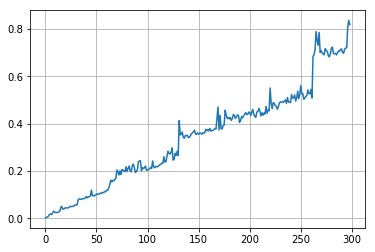

In [83]:
plt.plot(elapsed)
plt.grid()

We can see intermittent surges at some points, which must be the time when resizing happens. However, overall elapsed time follows $O(n)$, which shows why ***amortization analysis*** makes sense.

### C-5.18

Give a formal proof that any sequence of n append or pop operations on an initially empty dynamic array takes O(n) time, if using the strategy described in Exercise C-5.16.

In [86]:
'''
Pop removes the last element of the array, and that shrinks the capacity, $N$,
of the array by half any time the number of elements in the array goes below $N/4$.

N appends takes O(n) as we've covered earlier in R5.5

Pop costs O(1) each time, and at the resize, it costs N. 

Another way to consider this is that there are a minimum of N/2 operations (N being your starting value)
between any growth or shrink operations. For instance, if you grow at N=20:
 - you will not shrink until N gets to 10 (N/2 pop operations)
 - or double again until N gets to 40 (which gives you N append operations)
 
 If you shrink at 20:
 - you will not shrink until N gets to 10 (N/2 pop operations)
 - you will not grow until N gets to 40 (N append operation)
 
If append costs 3, and pop costs 1, then its still O(4n) for O(n) operations.

We can see C-5.17 for the experimental proof

'''

"\nPop removes the last element of the array, and that shrinks the capacity, $N$,\nof the array by half any time the number of elements in the array goes below $N/4$.\n\nN appends takes O(n) as we've covered earlier in R5.5\n\nPop costs O(1) each time, and at the resize, it costs N. \n\nAnother way to consider this is that there are a minimum of N/2 operations (N being your starting value)\nbetween any growth or shrink operations. For instance, if you grow at N=20:\n - you will not shrink until N gets to 10 (N/2 pop operations)\n - or double again until N gets to 40 (which gives you N append operations)\n \n If you shrink at 20:\n - you will not shrink until N gets to 10 (N/2 pop operations)\n - you will not grow until N gets to 40 (N append operation)\n \nIf append costs 3, and pop costs 1, then its still O(4n) for O(n) operations.\n\nWe can see C-5.17 for the experimental proof\n\n"

### C-5.19

Consider a variant of Exercise C-5.16, in which an array of capacity N is resized to capacity precisely that of the number of elements, any time the number of elements in the array goes strictly below N/4. Give a formal proof that any sequence of n append or pop operations on an initially empty dynamic array takes O(n) time.

In [87]:
'''
Similar to C-5.18
'''

'\nSimilar to C-5.18\n'

### C-5.20

Consider a variant of Exercise C-5.16, in which an array of capacity N, is resized to capacity precisely that of the number of elements, any time the number of elements in the array goes strictly below N/2. Show that there exists a sequence of n operations that requires Ω(n2) time to execute.

In [85]:
"""
O(n) holds in the previous example, because there is a limit to the number of growths/shrinks you can do
in immediate succession, and there is always a buffer zone in between these clusters that scales with N

In this case, however, after you shrink you can immediately grow and after you grow you can immediately shrink.

This means that there is a pop, append loop where each one takes O(n) time to complete without an opportunity to 
amortize against it.  Overall, n insertions/pops that take O(n) time each will result in O(n^2)

"""

'\nO(n) holds in the previous example, because there is a limit to the number of growths/shrinks you can do\nin immediate succession, and there is always a buffer zone in between these clusters that scales with N\n\nIn this case, however, after you shrink you can immediately grow and after you grow you can immediately shrink.\n\nThis means that there is a pop, append loop where each one takes O(n) time to complete without an opportunity to \namortize against it.  Overall, n insertions/pops that take O(n) time each will result in O(n^2)\n\n'

### C-5.21

In Section 5.4.2, we described four different ways to compose a long string: (1) repeated concatenation, (2) appending to a temporary list and then joining, (3) using list comprehension with join, and (4) using genera- tor comprehension with join. Develop an experiment to test the efficiency of all four of these approaches and report your findings.

In [99]:
import time
import matplotlib.pyplot as plt
import pandas as pd

class string_compare():
    def __init__(self, num_tests = 100):
        self._num_tests = num_tests
        
    def timer(func): # Timer wrapper to see how long each function takes to do the test; overwrites function return
        def wrapper(*args, **kwargs):
            start = time.time()
            for _ in range(args[0]._num_tests):
                func(*args)
            
            end = time.time()
            return(end-start)
        return wrapper

    @timer
    def _string_append(self, string):
        S = ''
        for char in string:
            S += char
        return S
    
    @timer
    def _list_then_join(self, string):
        S = []
        for char in string:
            S.append(char)
        return ''.join(S)
    
    @timer
    def _join_lc(self, string):
        return ''.join([x for x in string])
    
    @timer
    def _join_generator(self, string):
        return ''.join(x for x in string)


    def test_methods(self, test_cases):
        results = pd.DataFrame()
        for n in test_cases: # for each test case
            string = 'a'*n
            for name, func in [('String Append', self._string_append),
                         ('List then Join', self._list_then_join),
                         ('Join List Comprehension', self._join_lc), 
                         ('Join Generator', self._join_generator)]:
                results.loc[name, n] = func(string)/n # return execution time/len of append
        return results
        
        
tester = string_compare()
results = tester.test_methods([10**x for x in range(7)])      
results.head()

,1,10,100,1000,10000,100000,1000000
String Append,0.000020,0.000012,0.000006,0.000010,0.000009,0.000011,0.000011
List then Join,0.000030,0.000016,0.000008,0.000007,0.000007,0.000007,0.000008
Join List Comprehension,0.000035,0.000007,0.000006,0.000003,0.000003,0.000003,0.000003
Join Generator,0.000074,0.000010,0.000007,0.000005,0.000005,0.000005,0.000005


In [100]:
print(tester._string_append('aaa'))

3.1948089599609375e-05


### C-5.22

Develop an experiment to compare the relative efficiency of the `extend` method of Python's `list` class versus using repeated calls to `append` to accomplish the equivalent task.

In [27]:
x, y = [], []
time_x, time_y = [], []

test_num = list(map(int, [1e5, 2e5, 3e5, 4e5, 5e5]))
for i in test_num:
    
    tba = list(range(i))
    
    start = time.time()
    for i in tba:
        x.append(i)
    end = time.time()
    time_x.append(end-start)


    start = time.time()
    x.extend(tba)
    end = time.time()
    time_y.append(end-start)

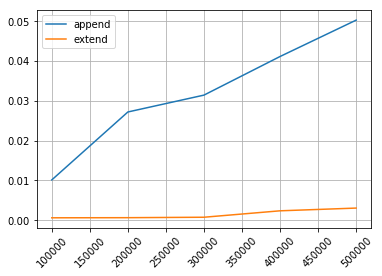

In [28]:
plt.plot(test_num, time_x, label='append')
plt.plot(test_num, time_y, label='extend')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

The method `extend` is a lot faster. This difference lies on the number of resizing of the dynamic list. With a call to `extend`, at most one resize operation will be performed, in constrast to `append`, which will perform resizing multiple times.

### C-5.23

Based on the discussion on constructing new list (list comprehension vs repeatedly appending), develop an experiment to compare the efficiency of Python's list comprehension syntax versus the construction of a list by means of repeated calls to append.

In [29]:
x, y = [], []
time_x, time_y = [], []

test_num = list(map(int, [1e6, 2e6, 3e6, 4e6, 5e6]))
for i in test_num:
    
    start = time.time()
    for k in range(i):
        x.append(k * k)
    end = time.time()
    time_x.append(end-start)

    start = time.time()
    x = [k * k for k in range(i)]
    end = time.time()
    time_y.append(end-start)

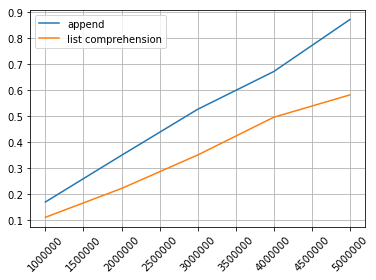

In [30]:
plt.plot(test_num, time_x, label='append')
plt.plot(test_num, time_y, label='list comprehension')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

### C-5.24 

Perform experiments to evaluate the efficiency of the `remove` method of Python's `list` class. Use known values so that all removals occur either at the beginning, middle, or end of the list.

In [104]:
N = [100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000]

In [105]:
df = pd.DataFrame(columns=N)

In [106]:
for n in N:
    lst = [i for i in range(n)]
    
    rm_fst = copy.deepcopy(lst)
    rm_mid = copy.deepcopy(lst)
    rm_fin = copy.deepcopy(lst)
    
    elapsed = []
    
    start = time.time()
    rm_fst.remove(0)
    end = time.time()
    elapsed.append(end - start)
    
    start = time.time()
    rm_mid.remove(n // 2)
    end = time.time()
    elapsed.append(end - start)
    
    start = time.time()
    rm_fin.remove(n - 1)
    end = time.time()
    elapsed.append(end - start)
    
    df[n] = elapsed

In [107]:
df.insert(0, column='k', value=['k=0', 'k=n//2', 'k=n'])

In [108]:
df  # Why is removing from position 0 faster???

,k,100,1000,10000,100000,1000000,10000000
0,k=0,0.000004,0.000003,0.000006,0.000050,0.000578,0.033287
1,k=n//2,0.000003,0.000006,0.000052,0.000512,0.005128,0.092438
2,k=n,0.000003,0.000013,0.000098,0.000981,0.009696,0.144096


### C-5.25

The syntax data.remove(value) for Python list data removes only the first occurrence of element value from the list. Give an implementation of a function, with signature remove all(data, value), that removes all occurrences of value from the given list, such that the worst-case running time of the function is O(n) on a list with n elements. Not that it is not efficient enough in general to rely on repeated calls to remove.

In [4]:
def remove_all(data, value):
    num_removed = 0
    for i in range(len(data)):
        if data[i] == value:
            num_removed += 1
        else:
            data[i-num_removed] = data[i] # shift back n places depending on how many removed
    return data[:-num_removed]

a = [1,2,3,4,1,2,3,4]
remove_all(a, 3)


[1, 2, 4, 1, 2, 4]

### C-5.26

Let B be an array of size n ≥ 6 containing integers from 1 to n − 5, inclusive, with exactly five repeated. Describe a good algorithm for finding the five integers in B that are repeated.

In [8]:
'''
1. Sort
2. Run a linear search 

This takes O(nlgn) + O(n) but it uses O(1) space

Another way is to use a dictionary.
'''

def find_5_sorted(S):
    S2 = sorted(S)
    iCounter = 1
    for i in range(len(S)-1):
        if S2[i] == S2[i+1]: 
            iCounter += 1
            if iCounter == 5:
                return S2[i]
        else:
            iCounter = 1
                
    return None

a = [1,1,1,1,2,2,2,2,3,3,3,3,3]
find_5_sorted(a)

3

### C-5.27

Given a Python list L of n positive integers, each represented with k = [logn] + 1 bits, describe an O(n)-time method for finding a k-bit integer not in L.

In [22]:
#bin(255) # if you want the other way
int('11111111', 2)

n = 20
S = [random.randint(0, 100) for _ in range(n)]
S2 = [bin(i) for i in S]
print(S)
print(S2)
S3 = [int(i) for i in S]
print(S3)

ans = [i for i in range(n)]
set(ans) - set(S)


[85, 36, 30, 86, 16, 48, 67, 96, 90, 46, 22, 34, 3, 7, 88, 23, 76, 40, 12, 87]
['0b1010101', '0b100100', '0b11110', '0b1010110', '0b10000', '0b110000', '0b1000011', '0b1100000', '0b1011010', '0b101110', '0b10110', '0b100010', '0b11', '0b111', '0b1011000', '0b10111', '0b1001100', '0b101000', '0b1100', '0b1010111']
[85, 36, 30, 86, 16, 48, 67, 96, 90, 46, 22, 34, 3, 7, 88, 23, 76, 40, 12, 87]


{0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 17, 18, 19}

### C-5.28

Argue why any solution to the previous problem must run in Ω(n) time.

In [23]:
'''
Unlike the task of trying to find an object or determine whether a specific object is not in 
our list, this requires us to find any number that isn't in the list, so there is no failure condition
that short-circuits the loop

As a result, we at least have to traverse each element of the list to 'know' that it is not an option for us

Since it must do this as a minimum (and also a maximum) every time, it must run in Ω(n) time
'''

"\nUnlike the task of trying to find an object or determine whether a specific object is not in \nour list, this requires us to find any number that isn't in the list, so there is no failure condition\nthat short-circuits the loop\n\nAs a result, we at least have to traverse each element of the list to 'know' that it is not an option for us\n\nSince it must do this as a minimum (and also a maximum) every time, it must run in Ω(n) time\n"

### C-5.29

A useful operation in databases is the natural join. If we view a database as a list of ordered pairs of objects, then the natural join of databases A and B is the list of all ordered triples (x,y,z) such that the pair (x,y) is in A and the pair (y,z) is in B. Describe and analyze an efficient algorithm for computing the natural join of a list A of n pairs and a list B of m pairs.

In [25]:
def natural_join(A, B):
    #First we create a mapping...
    Y_map = {}
    for x, y in A:
        if y in Y_map: # if not in dict
            Y_map[y].add(x) # Add to dictionary key as a value
        else: 
            Y_map[y] = set({x}) # else add to set
    
    print(Y_map)
    natural_join = []
    for y, z in B:
        if y in Y_map: # if common join 
            natural_join.extend([(x, y, z) for x in Y_map[y]])
        
    return natural_join


A = [(1,1), (1,3), (3,4), (3,5), (5,6), (4,5)]
B = [(1,4), (1, 5), (4, 2), (5, 1)]

print('Typical example', natural_join(A, B))

"""
Analysis:

The first part iterates O(n) times with each iteration taking O(1) time -> O(n)

The second part iterates O(m) times, with each join taking O(n) in the worst case.

For example, if all items in B start with 1 and all items in A end with 1, there will be m*n combos

Therefore the overall performance is O(n) + O(m*n), which is O(m*n)


"""

A = [(x, 1) for x in range(10)]
B = [(1, x) for x in range(10)]

print('\n\nWorst Case Example', natural_join(A, B))

{1: {1}, 3: {1}, 4: {3}, 5: {3, 4}, 6: {5}}
Typical example [(1, 1, 4), (1, 1, 5), (3, 4, 2), (3, 5, 1), (4, 5, 1)]
{1: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}}


Worst Case Example [(0, 1, 0), (1, 1, 0), (2, 1, 0), (3, 1, 0), (4, 1, 0), (5, 1, 0), (6, 1, 0), (7, 1, 0), (8, 1, 0), (9, 1, 0), (0, 1, 1), (1, 1, 1), (2, 1, 1), (3, 1, 1), (4, 1, 1), (5, 1, 1), (6, 1, 1), (7, 1, 1), (8, 1, 1), (9, 1, 1), (0, 1, 2), (1, 1, 2), (2, 1, 2), (3, 1, 2), (4, 1, 2), (5, 1, 2), (6, 1, 2), (7, 1, 2), (8, 1, 2), (9, 1, 2), (0, 1, 3), (1, 1, 3), (2, 1, 3), (3, 1, 3), (4, 1, 3), (5, 1, 3), (6, 1, 3), (7, 1, 3), (8, 1, 3), (9, 1, 3), (0, 1, 4), (1, 1, 4), (2, 1, 4), (3, 1, 4), (4, 1, 4), (5, 1, 4), (6, 1, 4), (7, 1, 4), (8, 1, 4), (9, 1, 4), (0, 1, 5), (1, 1, 5), (2, 1, 5), (3, 1, 5), (4, 1, 5), (5, 1, 5), (6, 1, 5), (7, 1, 5), (8, 1, 5), (9, 1, 5), (0, 1, 6), (1, 1, 6), (2, 1, 6), (3, 1, 6), (4, 1, 6), (5, 1, 6), (6, 1, 6), (7, 1, 6), (8, 1, 6), (9, 1, 6), (0, 1, 7), (1, 1, 7), (2, 1, 7), (3, 1, 7), (4, 1, 7), (

### C-5.30

When Bob wants to send Alice a message M on the Internet, he breaks M into n data packets, numbers the packets consecutively, and injects them into the network. When the packets arrive at Alice’s computer, they may be out of order, so Alice must assemble the sequence of n packets in order before she can be sure she has the entire message. Describe an efficient scheme for Alice to do this, assuming that she knows the value of n. What is the running time of this algorithm?

In [26]:
# Just use any sort - O(nlgn) or O(n^2)

import random


def binary_search(array, low, high, target):
    if low>=high:
        return low
    
    mid = (low+high)//2
    if array[mid] == target:
        return mid
    
    elif array[mid] > target:
        return binary_search(array, low, mid-1, target)
    
    else:
        return binary_search(array, mid+1, high, target)
      
#Note, we simulate the order of the packets using a list of integers from 1-10
def packet_reciever(S):
    final_array = []
    for i in range(len(S)):
        packet = S[i] #simulates her recieving that packet
        index = binary_search(final_array, 0, len(final_array), packet)
        index = min(index, len(final_array)-1)
        if final_array and final_array[index] < packet:
            index += 1
        final_array.insert(index, packet)
        print(f'New Packet: {packet} ->', '\t', final_array)

        
S = list(range(17))
random.shuffle(S)
packet_reciever(S)

"""
Alterative Approach - Insertion Sort!
"""
def insertion_sort(S, current_position):
    i = current_position
    while i>0 and S[i]<S[i-1]: #Note, this will short circuit at i = 0 so you will never check S[0-1]
        S[i], S[i-1] = S[i-1], S[i]
        i -= 1


def packet_reciever_2(S):
    final_array = [None]*len(S)
    for i in range (len(S)):
        final_array[i] = S[i]
        insertion_sort(final_array, i)
        print(f'New Packet: {S[i]} ->', '\t', final_array)

        
print('\n\nApproach 2 - Insertion Sort')        
packet_reciever_2(S)

New Packet: 7 -> 	 [7]
New Packet: 8 -> 	 [7, 8]
New Packet: 10 -> 	 [7, 8, 10]
New Packet: 5 -> 	 [5, 7, 8, 10]
New Packet: 14 -> 	 [5, 7, 8, 10, 14]
New Packet: 2 -> 	 [2, 5, 7, 8, 10, 14]
New Packet: 0 -> 	 [0, 2, 5, 7, 8, 10, 14]
New Packet: 6 -> 	 [0, 2, 5, 6, 7, 8, 10, 14]
New Packet: 16 -> 	 [0, 2, 5, 6, 7, 8, 10, 14, 16]
New Packet: 12 -> 	 [0, 2, 5, 6, 7, 8, 10, 12, 14, 16]
New Packet: 4 -> 	 [0, 2, 4, 5, 6, 7, 8, 10, 12, 14, 16]
New Packet: 11 -> 	 [0, 2, 4, 5, 6, 7, 8, 10, 11, 12, 14, 16]
New Packet: 9 -> 	 [0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16]
New Packet: 1 -> 	 [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16]
New Packet: 13 -> 	 [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16]
New Packet: 15 -> 	 [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
New Packet: 3 -> 	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


Approach 2 - Insertion Sort
New Packet: 7 -> 	 [7, None, None, None, None, None, None, None, None, None, None, None, None, None, None, N

### C-5.31

Describe a way to use recursion to add all the numbers in an n × n data set, represented as a list of lists.

In [27]:
# This is similar to the grokking algo example on recursing through folders
def list_r(S):
    total = 0
    if not isinstance(S, list):
        return S
    else:
        for element in S: total+= list_r(element)
    return total

def sum_list(S):
    total = list_r(S)
    return total

l = [[1,1,1,1,1], [2,2], 5]
sum_list(l)

14

### P-5.32

Write a Python function that takes two three-dimensional numeric data sets and adds them componentwise.

In [30]:
a = np.ones((2, 3, 4))
b = np.ones((2, 3, 4))
a+b

array([[[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]],

       [[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]]])

### P-5.33

Write a Python program for a matrix class that can add and multiply two-dimensional arrays of numbers, assuming the dimensions agree appropriately for the operation.

In [32]:
a = np.ones((2, 4))
b = np.ones((2, 4))
# Use a flag to choose add or multiply
a+b
a*b

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

### P-5.34

Write a program that can perform the Caesar cipher for English message that include both upper and lowercase characters

In [36]:
class CaesarCipher:
    """Class for doing encryption and decrpytion using a Caesar cipher - shift by n."""
    
    def __init__(self, shift):
        """Construct Caesar cipher using given integer shift for rotation."""
        encoder = [None] * 26
        decoder = [None] * 26
        for k in range(26):
            encoder[k] = chr((k + shift) % 26 + ord('A'))
            decoder[k] = chr((k - shift) % 26 + ord('A'))
        self._forward = ''.join(encoder)
        self._backward = ''.join(decoder)
    
    def encrpyt(self, message):
        """Return string representing encripted message."""
        return self._transform(message, self._forward)
    
    def decrpyt(self, secret):
        """Return decrpyted message given encrpyted secret."""""
        return self._transform(secret, self._backward)
    
    def _transform(self, original, code):
        """Utility to perform transformation based on given code string."""""
        msg = list(original)
        for k in range(len(msg)):
            if msg[k].isupper():
                j = ord(msg[k]) - ord('A')
                msg[k] = code[j]
            elif msg[k].islower():
                j = ord(msg[k]) - ord('a')
                msg[k] = code[j]
        return ''.join(msg)

Sample:

In [37]:
cipher = CaesarCipher(3)
message = "TEST MESSAGE GO, lower case"

In [38]:
coded = cipher.encrpyt(message)
coded

'WHVW PHVVDJH JR, ORZHU FDVH'

In [39]:
answer = cipher.decrpyt(coded)
answer

'TEST MESSAGE GO, LOWER CASE'

### P-5.35

Implement a class, SubstitutionCipher, with a constructor that takes a string with the 26 uppercase letters in an arbitrary order and uses that for the forward mapping for encryption (akin to the self. forward string in our CaesarCipher class of Code Fragment 5.11). You should derive the backward mapping from the forward version.

In [33]:
class SubstitutionCipher():
    def __init__(self, code = 'BCDEFGHIJKLMNOPQRSTUVWXYZA'): # Shift all forward by 1
        self._forward = code
        temp_bwd = [None]*26
        for i in range(len(code)):
            index = ord(self._forward[i])-ord('A') # 
            temp_bwd[index] = chr(i + ord('A'))
        self._backward = ''.join(temp_bwd)
        
        
    def _translate(self, message, code):
        result = []
        for char in message:
            if char.isupper():
                result.append(code[ord(char)-ord('A')])
            else:
                result.append(char)
        return ''.join(result)
    
    def encode(self, message):
        return self._translate(message, self._forward)
    
    def decode(self, message):
        return self._translate(message, self._backward)

                     
sc = SubstitutionCipher()
        
secret = sc.encode("I'VE COME TO TALK TO YOU AGAIN")
print(secret)
message = sc.decode(secret)
print(message)

J'WF DPNF UP UBML UP ZPV BHBJO
I'VE COME TO TALK TO YOU AGAIN


### P-5.36

Redesign the CaesarCipher class as a subclass of the SubstitutionCipher from the previous problem.

In [34]:
class CaesarCipher2(SubstitutionCipher):
    def __init__(self, shift=3):
        forward = ''.join(chr((i+shift)%26 + ord('A')) for i in range(26))
        super().__init__(forward)
        
sc = CaesarCipher2()
        
secret = sc.encode("BECAUSE A VISION SOFTLY CREEPING")
print(secret)
message = sc.decode(secret)
print(message)

EHFDXVH D YLVLRQ VRIWOB FUHHSLQJ
BECAUSE A VISION SOFTLY CREEPING


### P-5.37

Design a RandomCipher class as a subclass of the SubstitutionCipher from Exercise P-5.35, so that each instance of the class relies on a random permutation of letters for its mapping.